# Wyzwanie: Analiza tekstu o Data Science

W tym przykładzie wykonamy proste ćwiczenie obejmujące wszystkie kroki tradycyjnego procesu Data Science. Nie musisz pisać żadnego kodu, wystarczy kliknąć na poniższe komórki, aby je uruchomić i obserwować wynik. Jako wyzwanie, zachęcamy do wypróbowania tego kodu z różnymi danymi.

## Cel

W tej lekcji omawialiśmy różne pojęcia związane z Data Science. Spróbujmy odkryć więcej powiązanych koncepcji, wykonując **analizę tekstu**. Zaczniemy od tekstu o Data Science, wyodrębnimy z niego słowa kluczowe, a następnie spróbujemy zwizualizować wynik.

Jako tekst wykorzystamy stronę o Data Science z Wikipedii:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Krok 1: Pobieranie danych

Pierwszym krokiem w każdym procesie analizy danych jest pobranie danych. W tym celu użyjemy biblioteki `requests`:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Krok 2: Przekształcanie danych

Kolejnym krokiem jest przekształcenie danych w formę odpowiednią do przetwarzania. W naszym przypadku pobraliśmy kod źródłowy HTML ze strony i musimy go zamienić na zwykły tekst.

Istnieje wiele sposobów, aby to zrobić. Skorzystamy z najprostszego wbudowanego obiektu [HTMLParser](https://docs.python.org/3/library/html.parser.html) z języka Python. Musimy utworzyć podklasę klasy `HTMLParser` i zdefiniować kod, który będzie zbierał cały tekst znajdujący się wewnątrz znaczników HTML, z wyjątkiem znaczników `<script>` i `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Krok 3: Uzyskiwanie wniosków

Najważniejszym krokiem jest przekształcenie naszych danych w formę, z której możemy wyciągnąć wnioski. W naszym przypadku chcemy wyodrębnić słowa kluczowe z tekstu i sprawdzić, które z nich są bardziej znaczące.

Użyjemy biblioteki Python o nazwie [RAKE](https://github.com/aneesha/RAKE) do ekstrakcji słów kluczowych. Najpierw zainstalujmy tę bibliotekę, jeśli nie jest jeszcze dostępna:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Główna funkcjonalność jest dostępna z obiektu `Rake`, który możemy dostosować za pomocą niektórych parametrów. W naszym przypadku ustawimy minimalną długość słowa kluczowego na 5 znaków, minimalną częstotliwość występowania słowa kluczowego w dokumencie na 3 oraz maksymalną liczbę słów w słowie kluczowym na 2. Śmiało eksperymentuj z innymi wartościami i obserwuj wynik.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Uzyskaliśmy listę terminów wraz z przypisanym stopniem ważności. Jak widać, najbardziej istotne dziedziny, takie jak uczenie maszynowe i big data, znajdują się na szczycie listy.

## Krok 4: Wizualizacja Wyniku

Ludzie najlepiej interpretują dane w formie wizualnej. Dlatego często warto zwizualizować dane, aby wyciągnąć pewne wnioski. Możemy użyć biblioteki `matplotlib` w Pythonie, aby przedstawić prosty rozkład słów kluczowych wraz z ich istotnością:


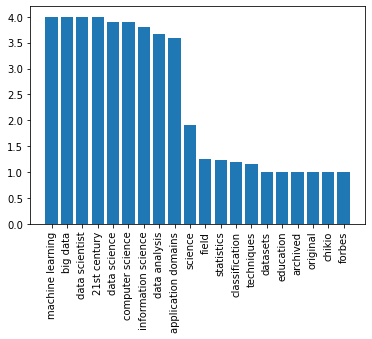

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Istnieje jednak jeszcze lepszy sposób na wizualizację częstotliwości słów - za pomocą **Word Cloud**. Będziemy musieli zainstalować kolejną bibliotekę, aby wygenerować chmurę słów z naszej listy słów kluczowych.


In [71]:
!{sys.executable} -m pip install wordcloud

Obiekt `WordCloud` jest odpowiedzialny za przyjmowanie oryginalnego tekstu lub wstępnie obliczonej listy słów z ich częstotliwościami i zwraca obraz, który następnie można wyświetlić za pomocą `matplotlib`:


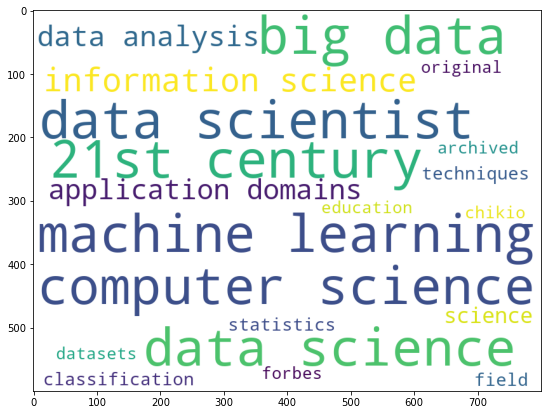

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Możemy również przekazać oryginalny tekst do `WordCloud` - zobaczmy, czy uda nam się uzyskać podobny wynik:


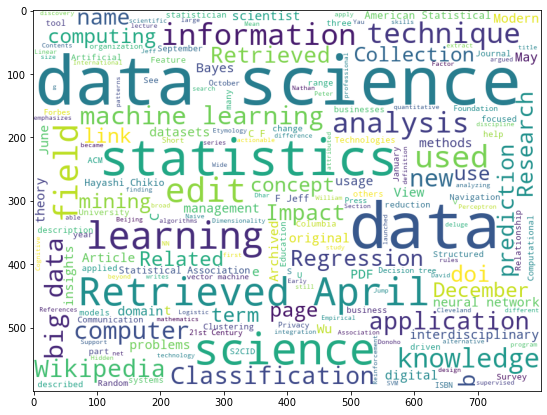

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Możesz zauważyć, że chmura słów wygląda teraz bardziej imponująco, ale zawiera również sporo szumu (np. niepowiązane słowa, takie jak `Retrieved on`). Dodatkowo, otrzymujemy mniej słów kluczowych składających się z dwóch wyrazów, takich jak *data scientist* czy *computer science*. Dzieje się tak, ponieważ algorytm RAKE znacznie lepiej radzi sobie z wybieraniem odpowiednich słów kluczowych z tekstu. Ten przykład ilustruje, jak ważne jest wstępne przetwarzanie i czyszczenie danych, ponieważ klarowny obraz na końcu pozwala podejmować lepsze decyzje.

W tym ćwiczeniu przeszliśmy przez prosty proces wydobywania znaczenia z tekstu z Wikipedii w formie słów kluczowych i chmury słów. Ten przykład jest dość prosty, ale dobrze pokazuje wszystkie typowe kroki, jakie podejmuje data scientist podczas pracy z danymi, począwszy od pozyskiwania danych, aż po wizualizację.

W naszym kursie omówimy wszystkie te kroki szczegółowo.



---

**Zastrzeżenie**:  
Ten dokument został przetłumaczony za pomocą usługi tłumaczeniowej AI [Co-op Translator](https://github.com/Azure/co-op-translator). Chociaż dokładamy wszelkich starań, aby zapewnić dokładność, prosimy pamiętać, że automatyczne tłumaczenia mogą zawierać błędy lub nieścisłości. Oryginalny dokument w jego rodzimym języku powinien być uznawany za wiarygodne źródło. W przypadku informacji krytycznych zaleca się skorzystanie z profesjonalnego tłumaczenia wykonanego przez człowieka. Nie ponosimy odpowiedzialności za jakiekolwiek nieporozumienia lub błędne interpretacje wynikające z korzystania z tego tłumaczenia.
